In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure

In [2]:
fig = Figure()
canvas = FigureCanvas(fig)
ax = fig.add_subplot(111)

In [3]:
def isNaN(num):
    return num != num

In [4]:
df = pd.read_csv ("2019-10-29_cozie_full.csv", index_col=0)
filtered_df = df.drop (columns=['clothing','lat_cozie','lon_cozie','responseSpeed_cozie','Floor','Latitude','Longitude','noise_sensing','voc_sensing','index','comfort_cozie','heartRate_cozie','light_cozie','noise_cozie','co2_sensing','humidity_sensing','light_sensing','temperature_sensing','temperature_mbient'],axis=1)
filtered_df['time'] = filtered_df['time'].apply(pd.Timestamp).dt.tz_convert('Asia/Singapore')
# Add new column to calculate duration 
filtered_df['time_duration'] = 0

In [5]:
grouped_users = filtered_df.groupby('user_id')

all_clusters = [] # Raw data
cluster_array = [] 
filtered_cluster_before = [] # Raw data that are clustered together according to duration
filtered_cluster_after = []

In [6]:
cresh01_df = grouped_users.get_group('cresh02')
thermal_cozie_ticks = [9,10,11]

In [7]:
# Gather all data relevant to specific user 
for index, datapoint in cresh01_df.iterrows():
    # print (data.time)
    if cluster_array == []:
        cluster_array.append(datapoint)
    else:
        if datapoint.time < last_time + pd.Timedelta(minutes=30):
            cluster_array.append(datapoint) 
        else:
            all_clusters.append(cluster_array)
            cluster_array = []
            cluster_array.append(datapoint)

    
    last_time = datapoint.time
#print (all_clusters)

# Keep clusters with more than a certain amount of data points

In [8]:
# Split the cluster up according to their timing
for i in range(len(all_clusters)):
    if (len(all_clusters[i]) > 1):
        # If have more than 1 datapoint
        tempList = all_clusters[i] # Store into tempList for splitting
        tempList2 = [] # Store all relevant datapoints in a cluster together before pushing into flitered_cluster
        nextDataPoint = []
         # Check if current datapoint is part of the cluster and room is not null
        for j in range(len(tempList)):
            space = tempList[j].Space_id

            if (j == 0):
                tempList2.append(tempList[j])
                last_time = tempList[j].time

            elif (tempList[j].time < last_time + pd.Timedelta(minutes=30)):
                tempList2.append(tempList[j])
                last_time = tempList[j].time

        filtered_cluster_before.append(tempList2)
print(filtered_cluster_before)    

[[time             2019-10-04 10:43:53.970000+08:00
thermal_cozie                                  11
user_id                                   cresh02
Space_id                                      NaN
room                                          NaN
time_duration                                   0
Name: 114, dtype: object, time             2019-10-04 10:44:23.826000+08:00
thermal_cozie                                  10
user_id                                   cresh02
Space_id                                      NaN
room                                          NaN
time_duration                                   0
Name: 115, dtype: object], [time             2019-10-07 09:19:55.708000+08:00
thermal_cozie                                 NaN
user_id                                   cresh02
Space_id                                       45
room                       BUILDING_MATERIALS_LAB
time_duration                                   0
Name: 261, dtype: object, time             2

# Keep clusters with more than a certain amount of data points and remove NaN

In [9]:
# Split the cluster up according to their timing
for i in range(len(all_clusters)):
    if (len(all_clusters[i]) > 1):
        # If have more than 1 datapoint
        tempList = all_clusters[i] # Store into tempList for splitting
        tempList2 = [] # Store all relevant datapoints in a cluster together before pushing into flitered_cluster
        nextDataPoint = []
         # Check if current datapoint is part of the cluster and room is not null
        for j in range(len(tempList)):
            space = tempList[j].Space_id
            
            if(isNaN(space) == False):    
                if (j == 0):
                    tempList2.append(tempList[j])
                    last_time = tempList[j].time

                elif (tempList[j].time < last_time + pd.Timedelta(minutes=30)):
                    tempList2.append(tempList[j])
                    last_time = tempList[j].time

        filtered_cluster_after.append(tempList2)
print(filtered_cluster_after)   

[[], [time             2019-10-07 09:19:55.708000+08:00
thermal_cozie                                 NaN
user_id                                   cresh02
Space_id                                       45
room                       BUILDING_MATERIALS_LAB
time_duration                                   0
Name: 261, dtype: object, time             2019-10-07 09:29:59.589000+08:00
thermal_cozie                                   9
user_id                                   cresh02
Space_id                                       45
room                       BUILDING_MATERIALS_LAB
time_duration                                   0
Name: 263, dtype: object, time             2019-10-07 09:34:13.984000+08:00
thermal_cozie                                  10
user_id                                   cresh02
Space_id                                       45
room                       BUILDING_MATERIALS_LAB
time_duration                                   0
Name: 265, dtype: object], [], [], [time  

# Show how many datapoints are in each cluster prior to removing

In [10]:
for i in range(len(filtered_cluster_before)):
    print("{0}:{1} ".format(i,(len(filtered_cluster_before[i]))))

0:2 
1:3 
2:2 
3:2 
4:2 
5:3 
6:2 
7:2 
8:9 
9:5 
10:3 
11:2 
12:3 
13:2 
14:3 
15:3 
16:2 
17:2 
18:4 
19:2 
20:2 
21:4 
22:17 
23:17 
24:3 
25:2 
26:5 
27:2 
28:2 


# Add in values to the duration difference column

In [11]:
for i in range(len(filtered_cluster_before)):
    # First variable have no time difference, thus 0.0s
    timeDifferenceList = [0.0]
    for j in range(len(filtered_cluster_before[i])):
        if (j == 0):
            last_time = filtered_cluster_before[i][j].time
        else:
            timeDiff = filtered_cluster_before[i][j].time - last_time
            filtered_cluster_before[i][j].time_duration = (timeDiff.total_seconds()/60)
            # Set the last time as the current one
            last_time = filtered_cluster_before[i][j].time
            
for i in range(len(filtered_cluster_after)):
    # First variable have no time difference, thus 0.0s
    timeDifferenceList = [0.0]
    for j in range(len(filtered_cluster_after[i])):
        if (j == 0):
            last_time = filtered_cluster_after[i][j].time
        else:
            timeDiff = filtered_cluster_after[i][j].time - last_time
            filtered_cluster_after[i][j].time_duration = (timeDiff.total_seconds()/60)
            # Set the last time as the current one
            last_time = filtered_cluster_after[i][j].time

# Plot all graph before removal of NaN

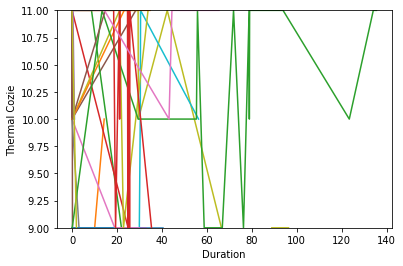

In [12]:
# Plot all clusters into ONE graph
thermal = []
duration = []
base = 0.0

for i in range(len(filtered_cluster_before)):
    for j in range(len(filtered_cluster_before[i])):
        base += filtered_cluster_before[i][j].time_duration
        thermal.append(filtered_cluster_before[i][j].thermal_cozie)
        duration.append(base)
        
    plt.plot(duration,thermal)
    plt.xlabel("Duration")
    plt.ylabel("Thermal Cozie")
    plt.ylim(9,11)
    
    # Re-init to remove previous cluster data
    base = 0.0
    thermal = []
    duration = []

# Plot all graph seperately before removal of NaN

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


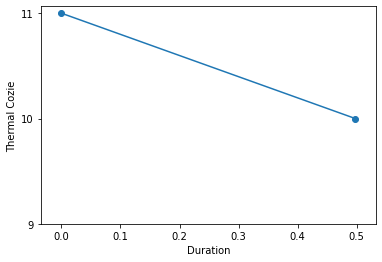

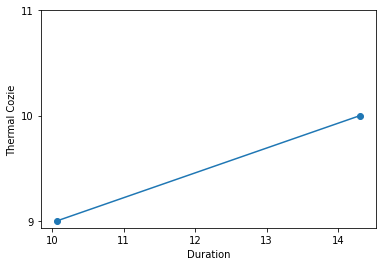

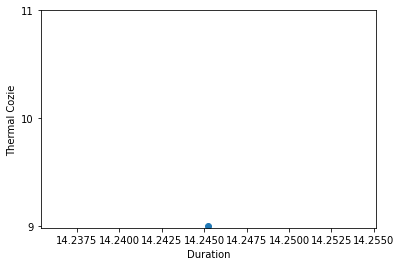

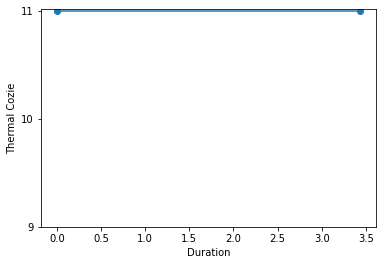

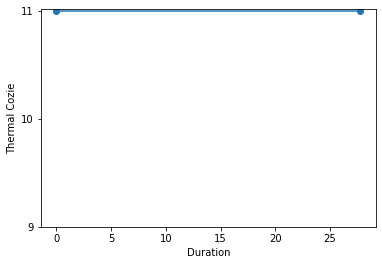

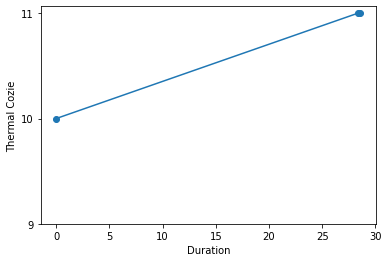

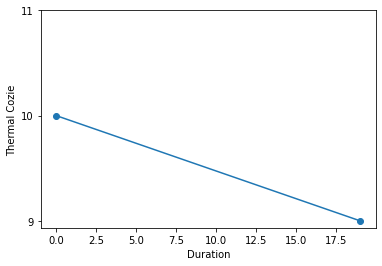

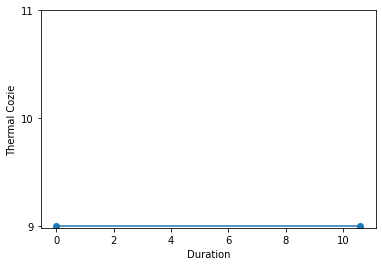

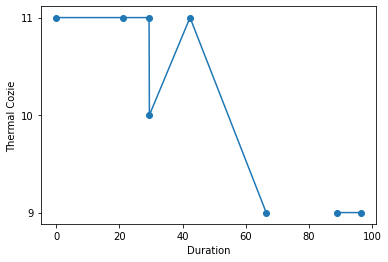

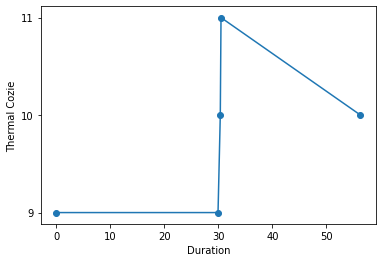

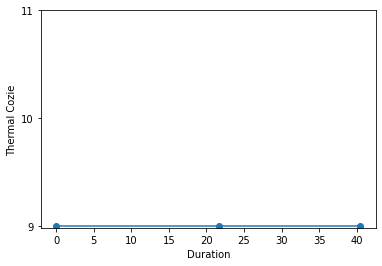

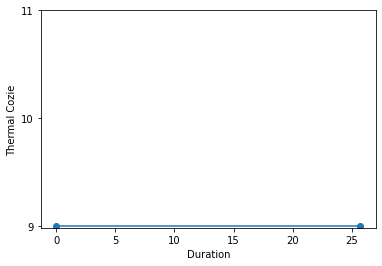

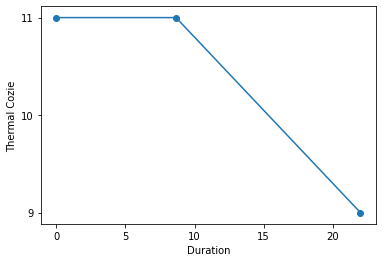

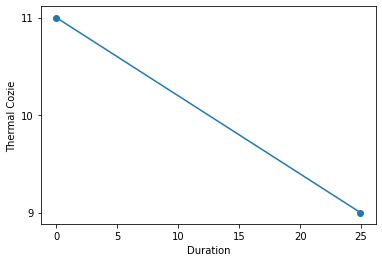

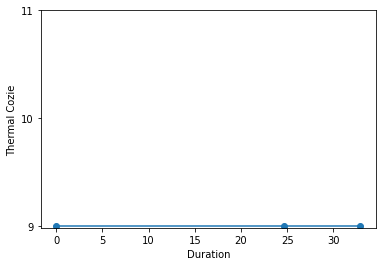

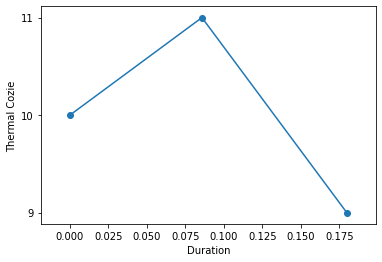

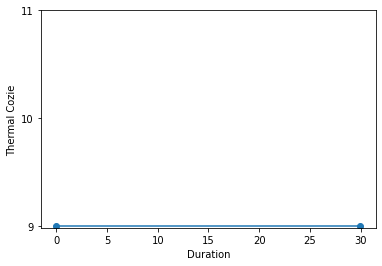

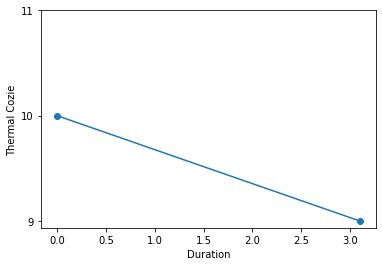

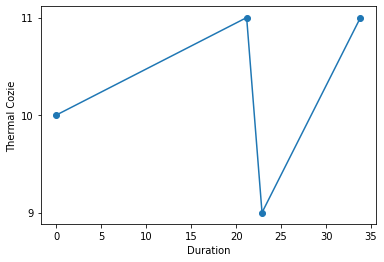

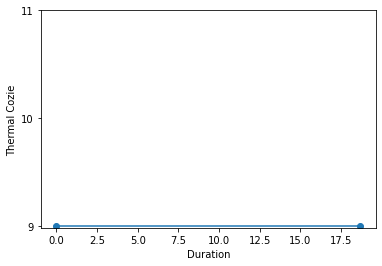

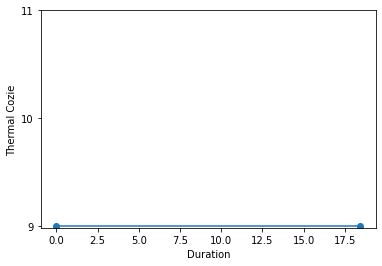

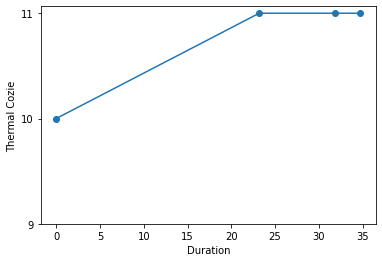

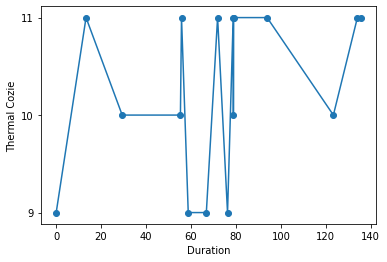

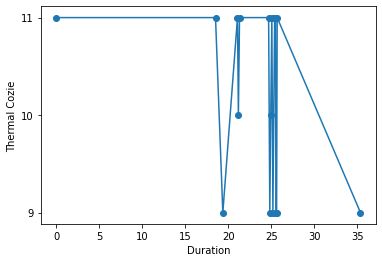

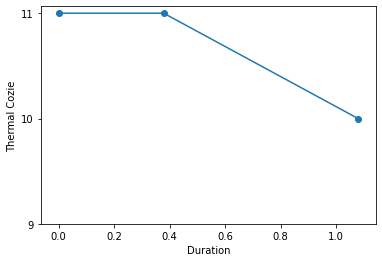

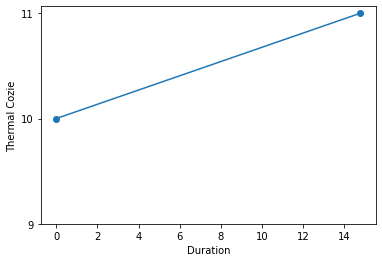

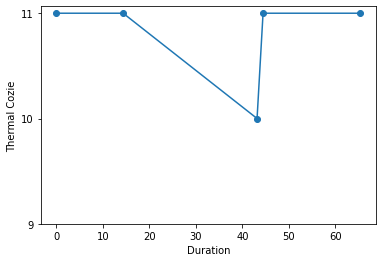

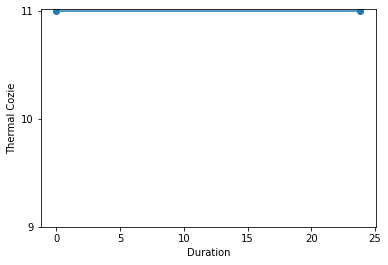

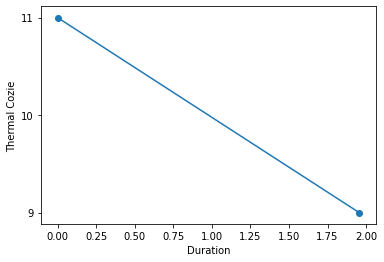

In [13]:
# Plot all clusters into ONE graph
thermal = []
duration = []
base = 0.0

for i in range(len(filtered_cluster_before)):
    for j in range(len(filtered_cluster_before[i])):
        base += filtered_cluster_before[i][j].time_duration
        thermal.append(filtered_cluster_before[i][j].thermal_cozie)
        duration.append(base)
    
    plt.figure()
    plt.scatter(duration,thermal)
    plt.plot(duration,thermal)
    plt.xlabel("Duration")
    plt.ylabel("Thermal Cozie")
    plt.yticks(thermal_cozie_ticks)
    
    # Re-init to remove previous cluster data
    base = 0.0
    thermal = []
    duration = []

# Remove list with zero elements inside filtered_cluster_after

In [14]:
tempList3 = []
for i in range(len(filtered_cluster_after)):
    if (len(filtered_cluster_after[i]) > 1):
        tempList3.append(filtered_cluster_after[i])

filtered_cluster_after = tempList3
print(filtered_cluster_after)

[[time             2019-10-07 09:19:55.708000+08:00
thermal_cozie                                 NaN
user_id                                   cresh02
Space_id                                       45
room                       BUILDING_MATERIALS_LAB
time_duration                                   0
Name: 261, dtype: object, time             2019-10-07 09:29:59.589000+08:00
thermal_cozie                                   9
user_id                                   cresh02
Space_id                                       45
room                       BUILDING_MATERIALS_LAB
time_duration                             10.0647
Name: 263, dtype: object, time             2019-10-07 09:34:13.984000+08:00
thermal_cozie                                  10
user_id                                   cresh02
Space_id                                       45
room                       BUILDING_MATERIALS_LAB
time_duration                             4.23992
Name: 265, dtype: object], [time             2

# Show how many datapoint are in each cluster after filtering NaN and zero element

In [15]:
for i in range(len(filtered_cluster_after)):
    print("{0}:{1} ".format(i,(len(filtered_cluster_after[i]))))

0:3 
1:2 
2:3 
3:17 
4:17 
5:3 
6:2 
7:5 
8:2 
9:2 


# Plot all cluster into one graph

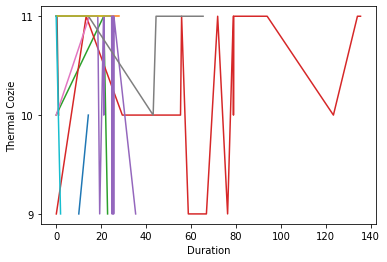

In [16]:
# Plot all clusters into ONE graph
thermal = []
duration = []
base = 0.0

for i in range(len(filtered_cluster_after)):
    for j in range(len(filtered_cluster_after[i])):
        base += filtered_cluster_after[i][j].time_duration
        thermal.append(filtered_cluster_after[i][j].thermal_cozie)
        duration.append(base)
        
    plt.plot(duration,thermal)
    plt.xlabel("Duration")
    plt.ylabel("Thermal Cozie")
    plt.yticks(thermal_cozie_ticks)
    
    # Re-init to remove previous cluster data
    base = 0.0
    thermal = []
    duration = []

# Plot all cluster into separate graphs

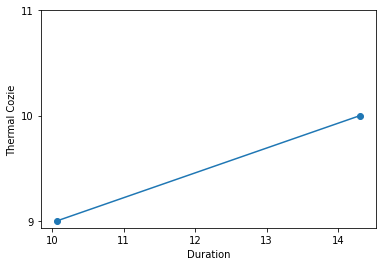

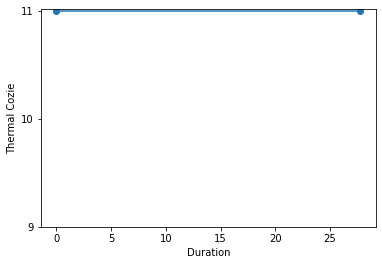

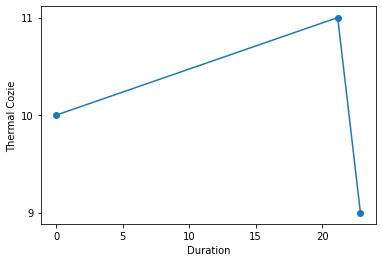

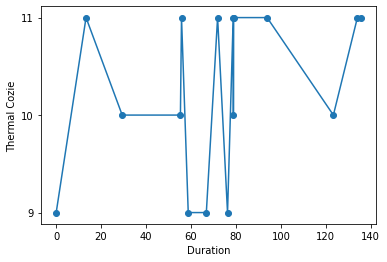

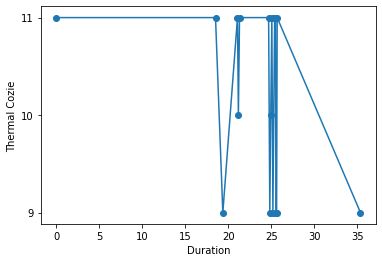

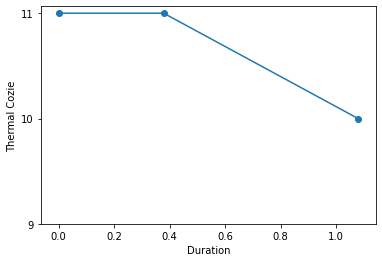

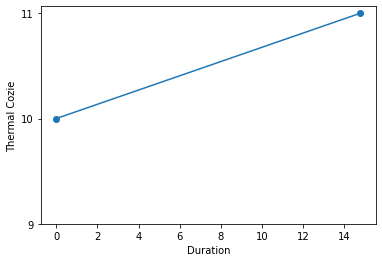

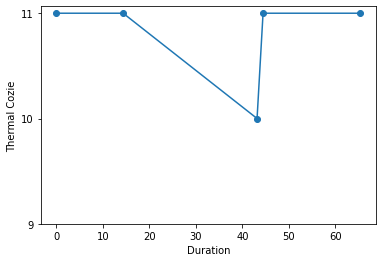

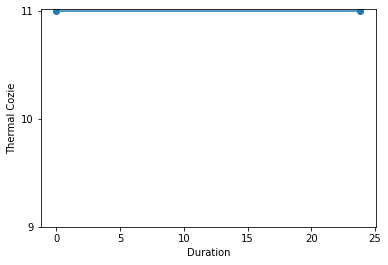

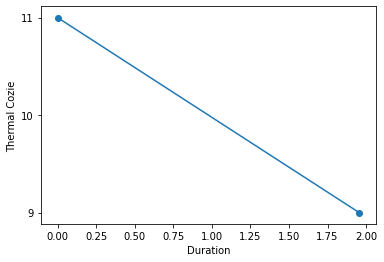

In [17]:
# Plot all clusters into ONE graph
thermal = []
duration = []
base = 0.0

for i in range(len(filtered_cluster_after)):
    for j in range(len(filtered_cluster_after[i])):
        base += filtered_cluster_after[i][j].time_duration
        thermal.append(filtered_cluster_after[i][j].thermal_cozie)
        duration.append(base)
    
    plt.figure()
    plt.scatter(duration,thermal)
    plt.plot(duration,thermal)
    plt.xlabel("Duration")
    plt.ylabel("Thermal Cozie")
    plt.yticks(thermal_cozie_ticks)
    
    # Re-init to remove previous cluster data
    base = 0.0
    thermal = []
    duration = []

# Plot test with vertical dotted lines

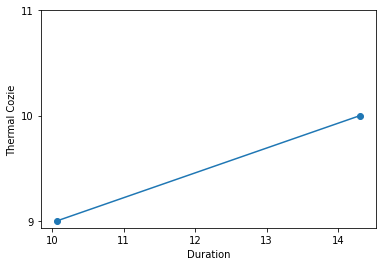

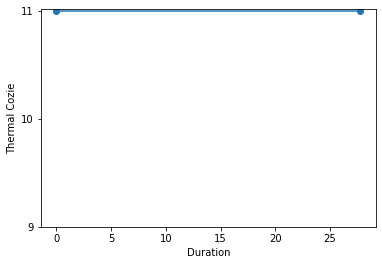

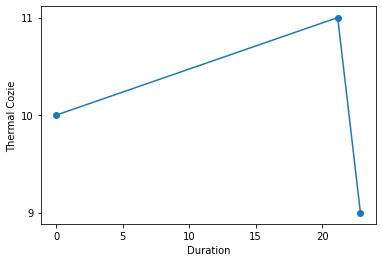

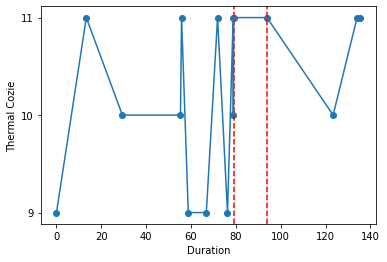

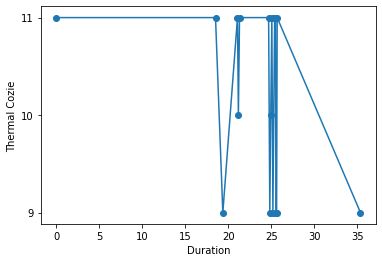

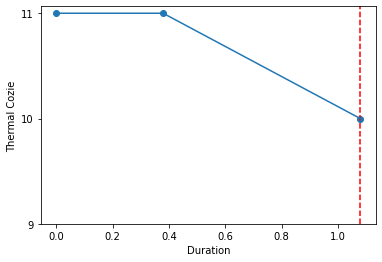

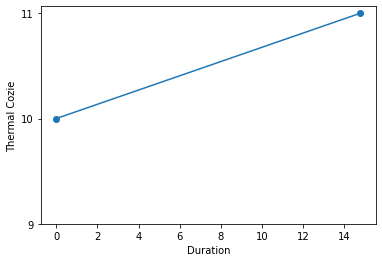

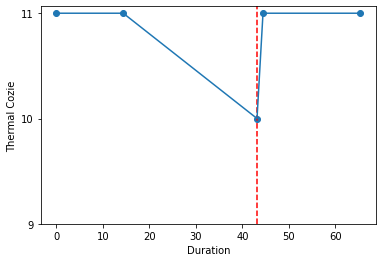

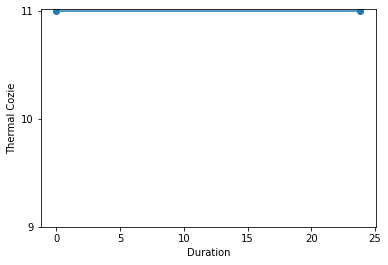

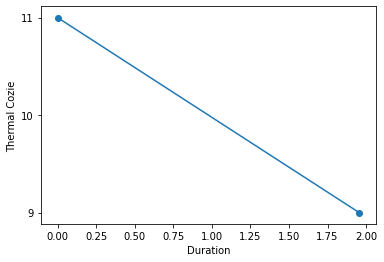

In [18]:
# Plot all clusters into ONE graph
thermal = []
duration = []
base = 0.0
dotted_lines = []

for i in range(len(filtered_cluster_after)):
    tempList = []
    for j in range(len(filtered_cluster_after[i])):
        if (j > 1):
            prev = filtered_cluster_after[i][j-1].room
            curr = filtered_cluster_after[i][j].room
            
            if (prev != curr):
                tempList.append(j)
                
    dotted_lines.append(tempList)

#print(dotted_lines)
    
for i in range(len(filtered_cluster_after)):
    lines = []
    for j in range(len(filtered_cluster_after[i])):
        base += filtered_cluster_after[i][j].time_duration
        thermal.append(filtered_cluster_after[i][j].thermal_cozie)
        duration.append(base)
        
    if(len(dotted_lines[i]) > 0):
        while(len(dotted_lines[i]) > 0):
            index = dotted_lines[i].pop()
            xValue = duration[index]
            plt.axvline(x = xValue, linestyle = '--', color = 'r')
        
        
    plt.scatter(duration,thermal)
    plt.plot(duration,thermal)
    plt.xlabel("Duration")
    plt.ylabel("Thermal Cozie")
    plt.yticks(thermal_cozie_ticks)
    plt.show()
    
    #print(filtered_cluster_after[0])
    #print(duration)
    
    # Re-init to remove previous cluster data
    base = 0.0
    thermal = []
    duration = []
    